In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns

In [2]:
def show_data():
    train_folder = [7554,7556,7557,7558]#,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(3,20,8):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            #print(data.info())
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
            data['X'] = data.X.astype(float)

            x = data.X.tolist()
            y = data.Y.tolist()

            fig=plt.figure(figsize=(5,3))
            ax=fig.add_subplot(111)

            plt.gca().invert_yaxis()
            ax.scatter(x,y,s=1,c='red')
            ax.set_xbound(lower=0.0, upper=1381)
            ax.set_ybound(lower=0.0, upper=925)

            plt.tight_layout()
            plt.show()

In [3]:
data = pd.read_csv(r'train/7554/SimpleTest/9.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          1103 non-null   object 
 1    Y         1101 non-null   float64
 2    Pressure  1101 non-null   float64
 3    TiltX     1101 non-null   float64
 4    TiltY     1101 non-null   float64
 5    Time      1101 non-null   object 
dtypes: float64(4), object(2)
memory usage: 51.8+ KB


In [5]:
print(data.columns)
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,1059.92747430419,842.854833,0.076402,-4257.0,988.0,00:04.5448411
1,1059.92747430419,842.854833,0.076402,-4257.0,988.0,00:04.5604847
2,1060.55941794665,842.960157,0.083482,-4257.0,988.0,00:04.5761906


In [6]:
data.columns = data.columns.str.replace(' ', '')

In [7]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

In [8]:
print(submit_time)
print(start_time)

Time Elapsed till drawing submit: 00:27.4825696
Time Elapsed till drawing started: 00:04.5281163


In [9]:
#data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
data['X'] = data.X.astype(float)
data['Time'] = data.Time.astype(str)
data = data.set_index(data['Time']).drop("Time", axis = 1)

In [10]:
#data = data.set_index(pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time).drop("Time", axis = 1)

In [11]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY
Time,,,,,
00:04.5448411,1059.927474,842.854833,0.076402,-4257.0,988.0
00:04.5604847,1059.927474,842.854833,0.076402,-4257.0,988.0
00:04.5761906,1060.559418,842.960157,0.083482,-4257.0,988.0


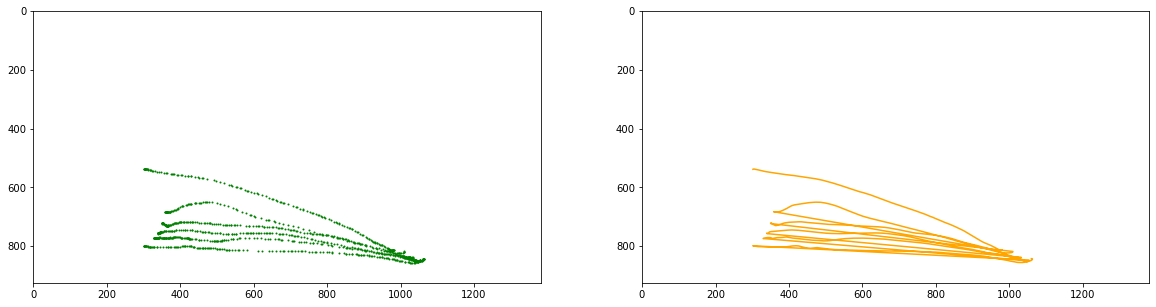

In [25]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='green')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,c='orange')
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)


plt.show()

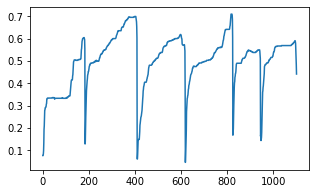

In [26]:
p = data.Pressure.tolist()
fig=plt.figure(figsize=(5,3))

ax=fig.add_subplot(111)
ax.plot(p)

plt.show()

In [27]:
def calculateDistance(x1,y1,x2,y2):
    dist = math.sqrt(((x2 - x1)**2) + ((y2 - y1)**2))
    return dist

distance = list()
for i in range(len(data.X)-1):
    distance.append(calculateDistance(data.X[i], data.Y[i], data.X[i+1], data.Y[i+1]))

In [28]:
print('max distance:',max(distance),'\nmin distance:',min(distance))

# Adjusting the best distance 
bestDistance=np.std(distance)

numberOfLines=[]
count=0
for d in range(len(distance)-1):
    if (distance[d+1] > distance[d]+np.mean(distance)):
        numberOfLines.append(d)
        count=count+1

print('Number of lines:',count)

max distance: 752.8922036069632 
min distance: 0.0
Number of lines: 38


In [29]:
X_diff = np.diff(data.X)
Y_diff = np.diff(data.Y)

In [30]:
hand_raising = 0
for i in range(len(data.X)-1):
    if ((X_diff[i] > np.std(X_diff)) or( Y_diff[i] > np.std(X_diff))):
        hand_raising +=1
        #print(i,i+1)
        #print(p[i], p[i+1])
        #print('x[i],y[i] :',x[i],',',y[i])
        #print('x[i+1], y[i+1] : ',x[i+1],',',y[i+1])
    
print("There are " + str(hand_raising) + " hand raising in the drawing")  

There are 5 hand raising in the drawing


In [31]:
hand_raising = 0
for i in range(len(data.X)-1):
    if ((data.X[i+1] - data.X[i] > 15) or( data.Y[i+1] - data.Y[i] > 15)):
        hand_raising +=1
        #print(i,i+1)
        #print(p[i], p[i+1])
        #print('x[i],y[i] :',x[i],',',y[i])
        #print('x[i+1], y[i+1] : ',x[i+1],',',y[i+1])
    
print("There are " + str(hand_raising) + " hand raising in the drawing")  

There are 5 hand raising in the drawing


In [32]:
hand_raising = 0
for i in range(len(p)-1):
    if (p[i+1] < p[i]-np.mean(p)):
        hand_raising +=1
        
print("There are " + str(hand_raising) + " hand raising in the drawing")  

There are 1 hand raising in the drawing


<IPython.core.display.Javascript object>


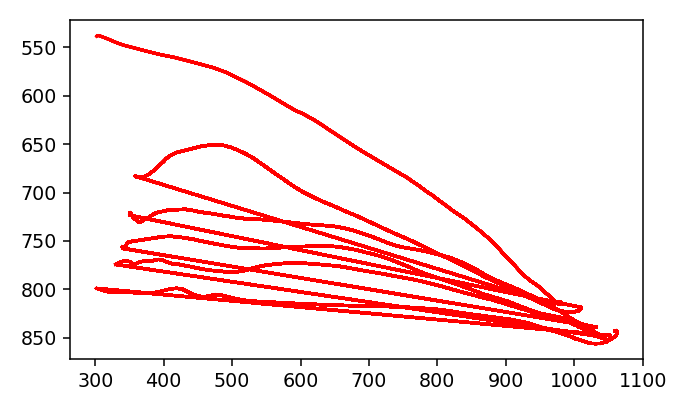

In [104]:
import psutil
%matplotlib notebook

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [106]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    if (p[i] - data.Pressure.max() > p[i-1]):
        print(p[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()


In [164]:
data.Pressure.min()

0.0295262075960636